In [1]:
import numpy as np
from astropy.table import Table
from astropy.io import ascii
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import pearsonr
from scipy.constants import c, au

In [2]:
"""
colourblind-safe colours
"""
COLORS = (
    '#000000',
    '#0072b2',
    '#56b4e9',
    '#009e73',
    '#cc79a7',
    '#d55e00',
    '#e69f00',
    '#f0e442')


In [3]:
t = Table.read("dr2_average_classified.vot", format="votable")
print len(t)

1025


In [4]:
powerlaw = t[t['alpha_nopeak'].mask==False]
powerlaw_n = powerlaw['n_obs']
low_peak = t[t['peak_below_72mhz']==True]
low_peak_n = low_peak['n_obs']
peaked = t[t['peaked']==True]
peaked_n = peaked['n_obs']
gps = t[t['gps']==True]
gps_n = gps['n_obs']
unclassified = t[t['unclassified']==True]
unclassified_n = unclassified['n_obs']

In [5]:
print "%d source total of which:-" % len(t)
print "- %d power law sources." % len(powerlaw)
print "- %d peak below 72MHz" % len(low_peak)
print "- %d MHz-peaked sources." % len(peaked)
print "- %d GPS sources." % len(gps)
print "- %d unclassified sources." % len(unclassified)

#print "%d low-peaking (<72MHz) sources of which %d have redshifts" % (len(low_peak), sum(~low_peak.mask['z']))
#print "%d gps sources of which %d have redshifts" % (len(gps), sum(~gps.mask['z']))

1025 source total of which:-
- 916 power law sources.
- 5 peak below 72MHz
- 76 MHz-peaked sources.
- 7 GPS sources.
- 18 unclassified sources.


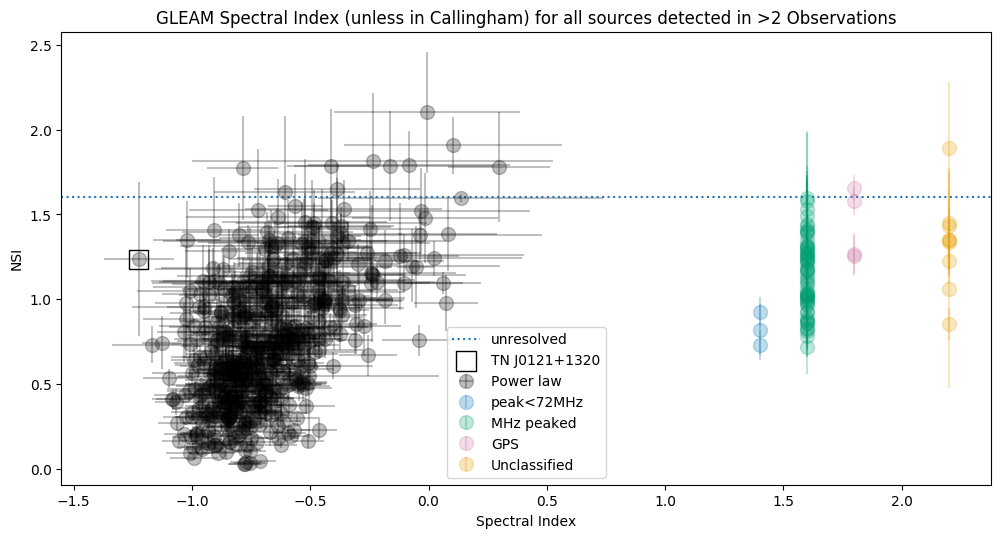

In [40]:
n_obs=2
#xlim = [60, 1050]
#x = np.logspace(np.log10(xlim[0]), np.log10(xlim[1]), 200)
plt.figure(figsize=(12.0, 6.0))
plt.errorbar(powerlaw['alpha'][powerlaw_n>n_obs], powerlaw['nsi'][powerlaw_n>n_obs], powerlaw['spread_nsi'][powerlaw_n>n_obs], powerlaw['e_alpha'][powerlaw_n>n_obs], 
             'o', markersize=10, alpha=0.25, label="Power law", color=COLORS[0])

plt.errorbar(1.4*np.ones(sum(low_peak_n>n_obs)), low_peak['nsi'][low_peak_n>n_obs], low_peak['spread_nsi'][low_peak_n>n_obs], 
             fmt='o', markersize=10, alpha=0.25, label="peak<72MHz", color=COLORS[1])

plt.errorbar(1.6*np.ones(sum(peaked_n>n_obs)), peaked['nsi'][peaked_n>n_obs], peaked['spread_nsi'][peaked_n>n_obs], 
             fmt='o', markersize=10, alpha=0.25, label="MHz peaked", color=COLORS[3])

plt.errorbar(1.8*np.ones(sum(gps_n>n_obs)), gps['nsi'][gps_n>n_obs], gps['spread_nsi'][gps_n>n_obs], 
             fmt='o', markersize=10, alpha=0.25, label="GPS", color=COLORS[4])

#plt.errorbar(1.8*np.ones(sum(convex_n>n_obs)), convex['nsi'][convex_n>n_obs], convex['spread_nsi'][convex_n>n_obs], 
#             fmt='o', markersize=10, alpha=0.25, label="GPS", color=COLORS[5])

plt.errorbar(2.2*np.ones(sum(unclassified_n>n_obs)), unclassified['nsi'][unclassified_n>n_obs], unclassified['spread_nsi'][unclassified_n>n_obs], 
             fmt='o', markersize=10, alpha=0.25, label="Unclassified", color=COLORS[6])

plt.scatter(-1.225, 1.235, marker='s', facecolors='none', s=200, edgecolor='black', label='TN J0121+1320')
plt.axhline(1.6, linestyle=':', label='unresolved')
plt.xlabel("Spectral Index")
plt.ylabel("NSI")
plt.title("GLEAM Spectral Index (unless in Callingham) for all sources detected in >%d Observations" % n_obs)

plt.legend(loc='lower center')
plt.savefig("alpha_nsi.pdf")